In [12]:
import numpy as np #numerical python
import pandas as pd #manipulation
from sklearn.model_selection import train_test_split
from sklearn import tree #tree pacakge for decision tree model
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/dataset/heart.csv"
df=pd.read_csv(path)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 1.0, 'Age distribuition')

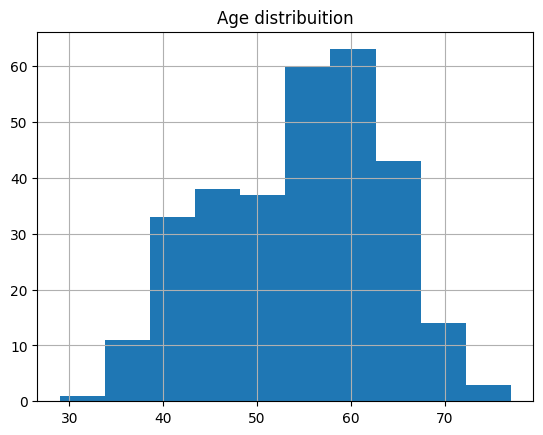

In [ ]:
df['age'].hist(grid=True, bins=10);
plt.title('Age distribuition')

<ipython-input-5-0d501e0f25ba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],  label='female')
<ipython-input-5-0d501e0f25ba>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['age'], label='male')


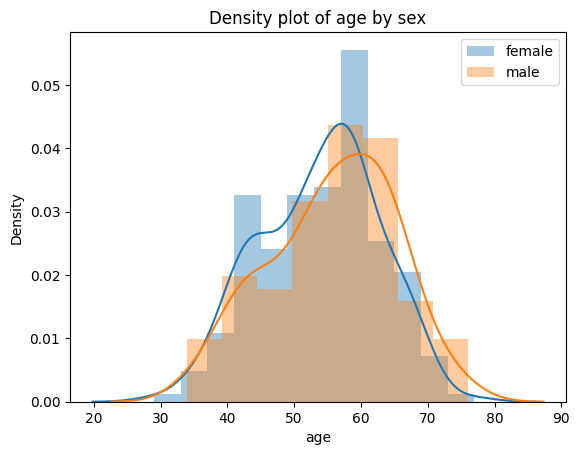

In [ ]:
sns.distplot(df[df['sex']==1]['age'],  label='female')
sns.distplot(df[df['sex']==0]['age'], label='male')
plt.legend()
plt.title('Density plot of age by sex')
plt.show()

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.histogram(df, x='trestbps', nbins=10, title='Resting Blood Pressure Distribution')
fig.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.



<Axes: xlabel='oldpeak'>

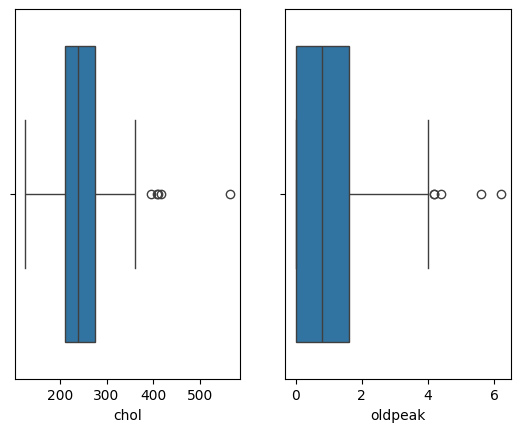

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols=2)
sns.boxplot(x='chol', data=df, orient='v', ax=axes[0])
sns.boxplot(x='oldpeak', data=df,  orient='v', ax=axes[1])

In [ ]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(df, y='chol', title='Cholesterol Boxplot')

# Add a new boxplot to the subplot
fig.add_box(y=df['oldpeak'], name='Oldpeak')


fig.show()
fig.write_html('plotly_grapgh.html')  #if you want to download the report in html format

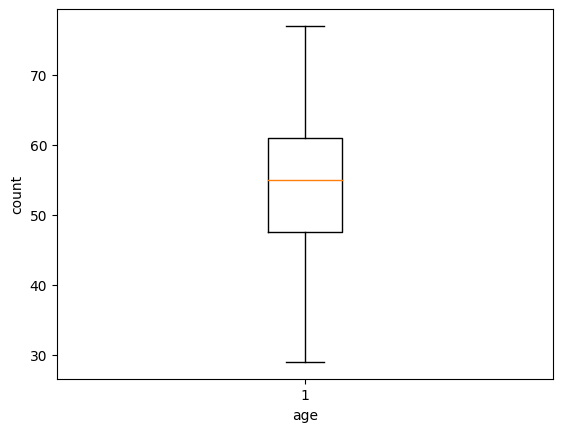

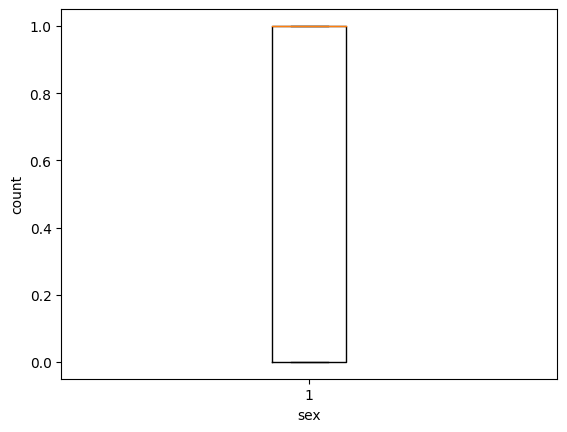

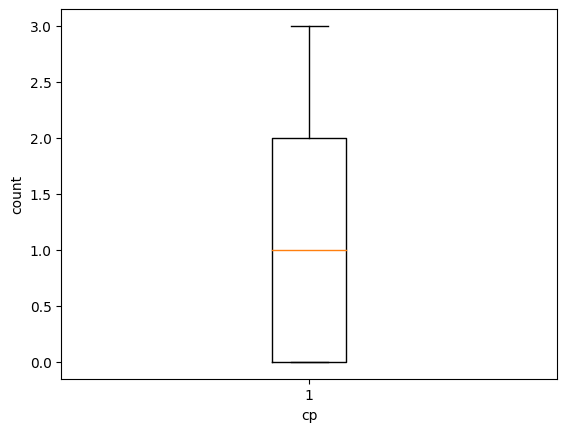

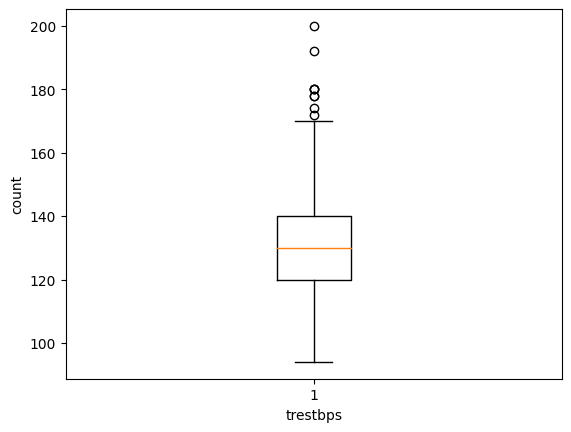

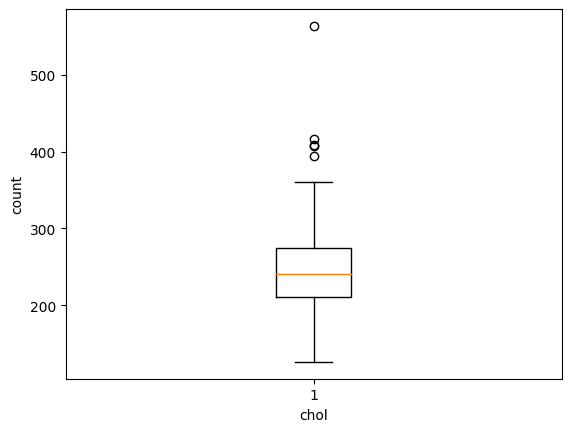

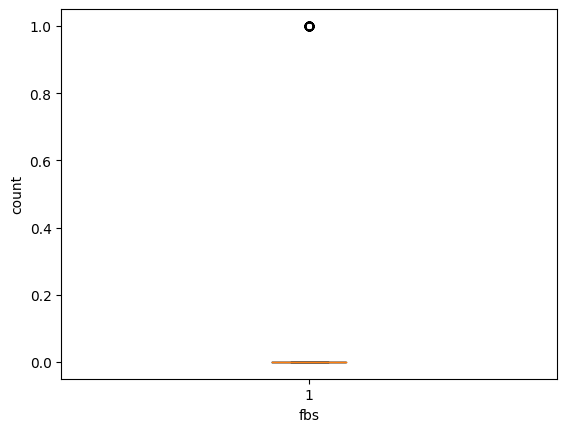

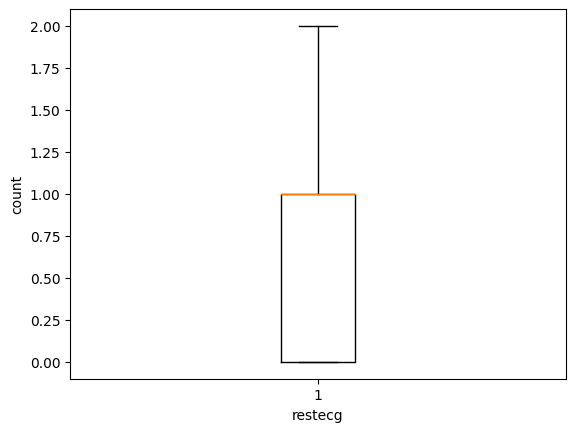

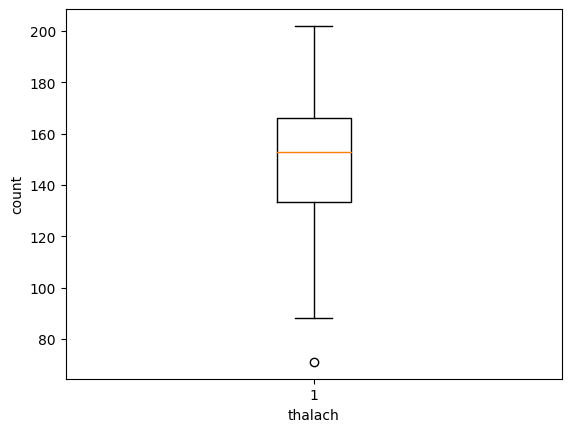

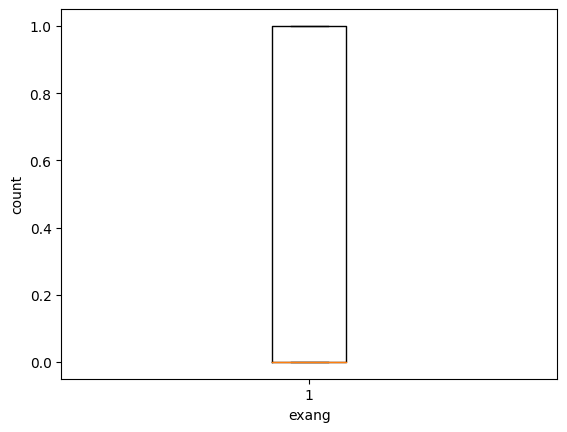

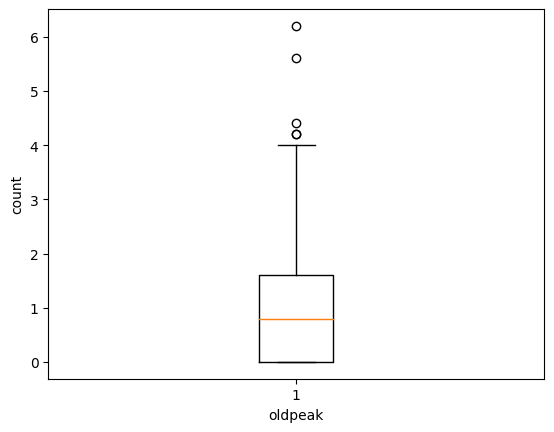

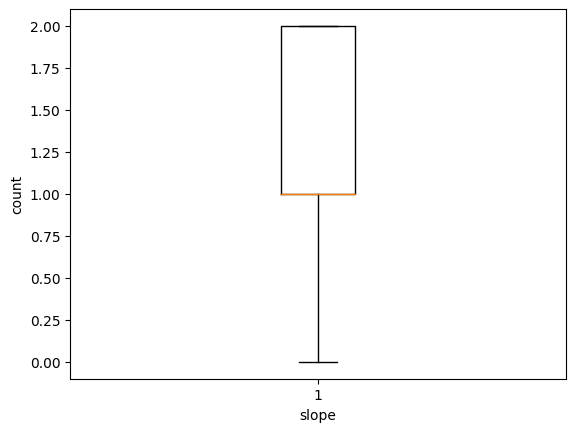

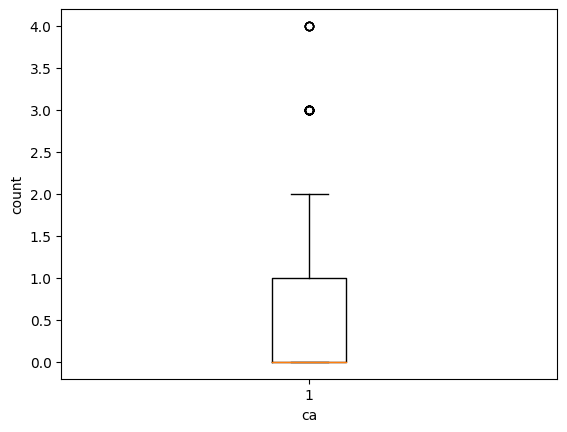

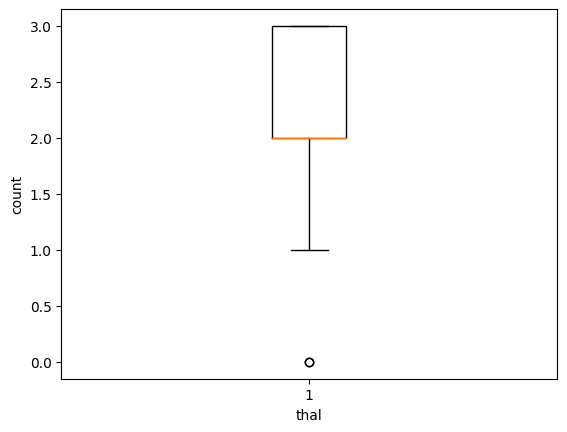

In [ ]:
for i in df.columns:
  if ((df[i].dtype!="object") & (i != "target")):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

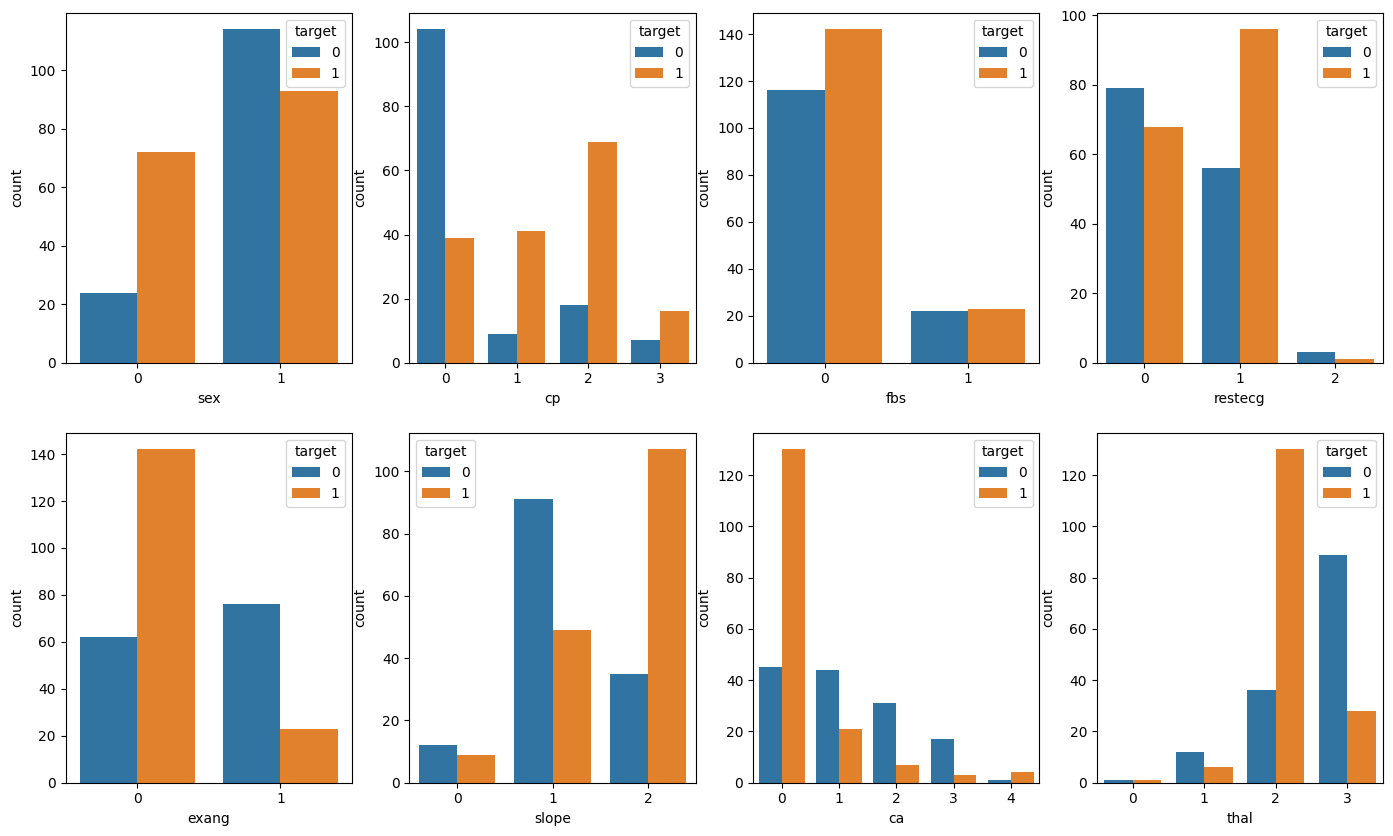

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for idx, feature in enumerate(cat_feat):
    if feature != 'target':
        ax = axes[int(idx/4), idx%4]   #0/4=(0),0%4=0
        sns.countplot(x=feature, hue='target', data=df,ax=ax)

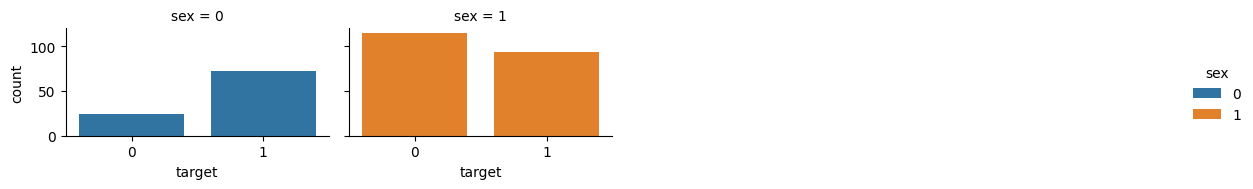

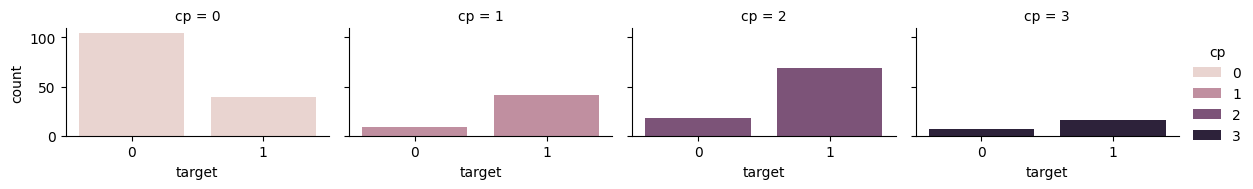

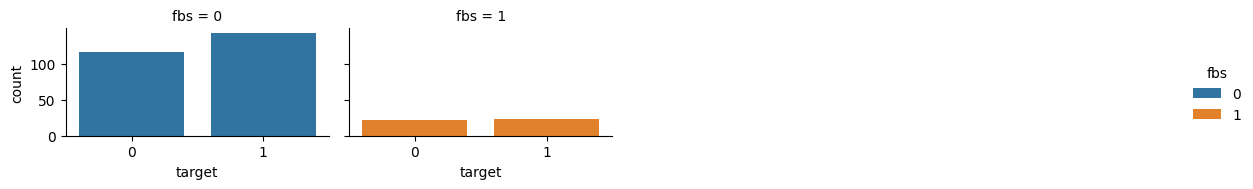

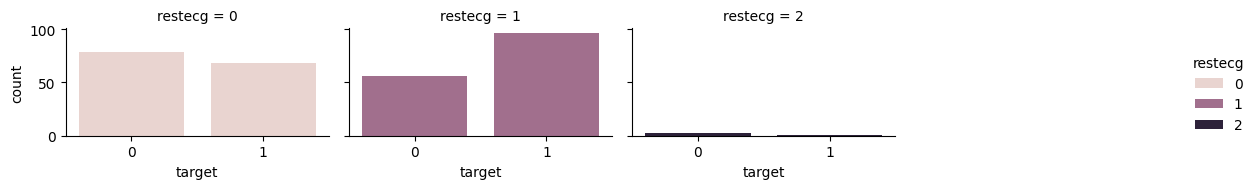

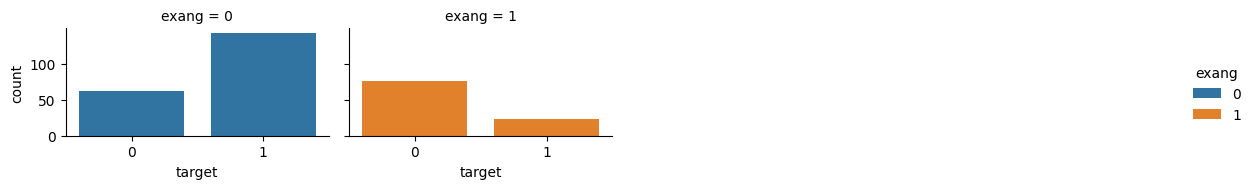

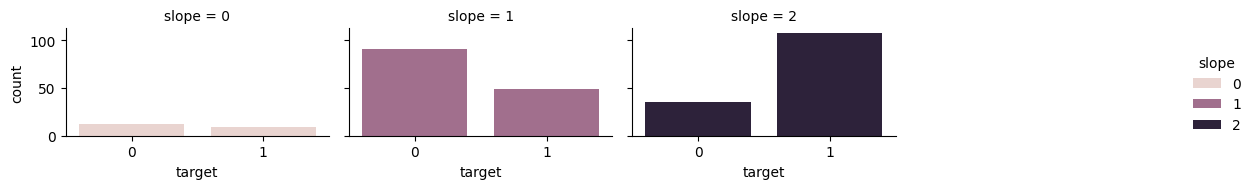

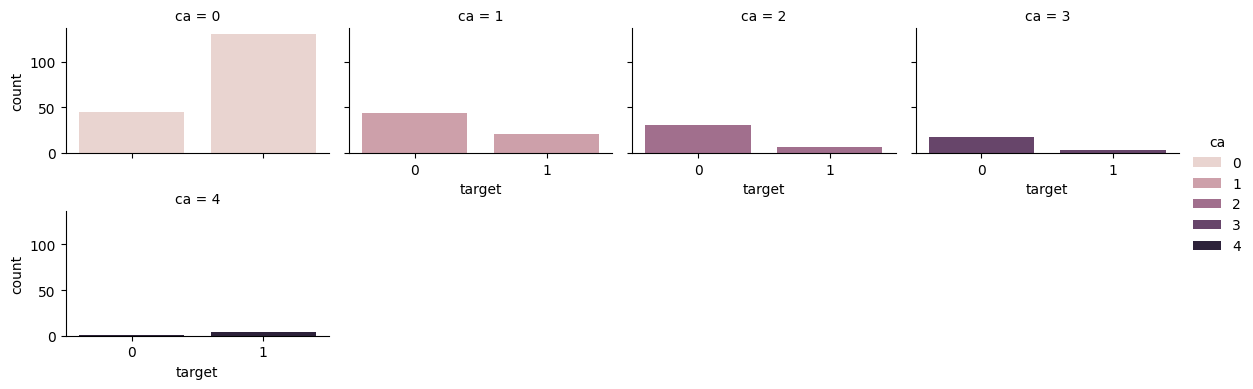

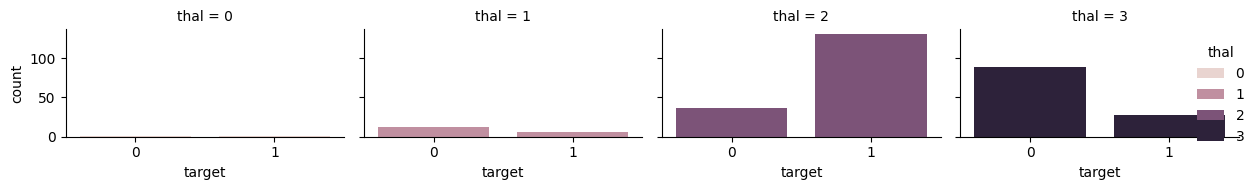

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create a single row with 8 columns
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[0], col=cat_feat[0], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[1], col=cat_feat[1], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[2], col=cat_feat[2], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[3], col=cat_feat[3], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[4], col=cat_feat[4], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[5], col=cat_feat[5], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[6], col=cat_feat[6], col_wrap=4, height=2, aspect=1.5)
sns.catplot(data=df, kind='count', x='target', hue=cat_feat[7], col=cat_feat[7], col_wrap=4, height=2, aspect=1.5)

plt.tight_layout()
plt.show()

Let's get some insights frm this chart:

Chest pain: the heart desease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart desease is higher for slope = 2

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2.

Text(0.5, 1.0, 'Count of target feature by sex')

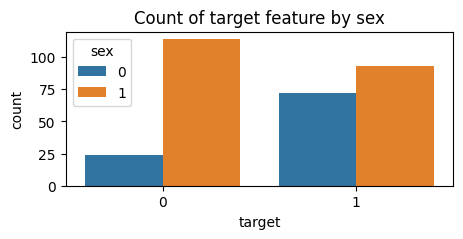

In [13]:
plt.rcParams['figure.figsize'] = (5,2)
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

The amount of healthy male people is greater than the amount of unhealthy. For women, the number of unhealthy women is higher.

Indented block

<Axes: >

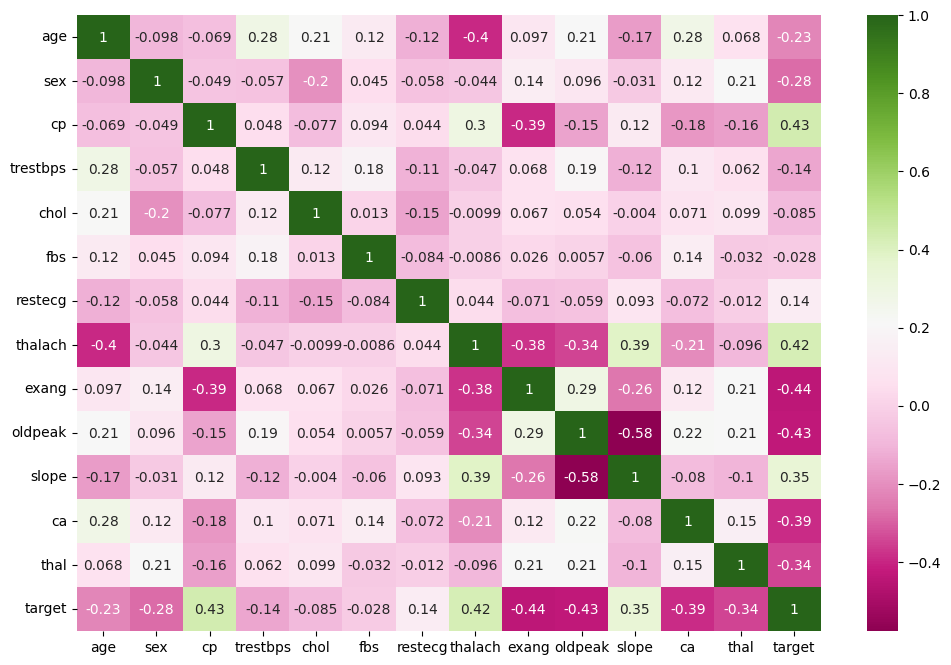

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='PiYG')

In [15]:
!pip install autoviz #autovisualization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 12.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20

In [16]:
import pandas as pd
path="/content/drive/MyDrive/Colab Notebooks/dataset/heart.csv"
df=pd.read_csv(path)

In [18]:
!pip install sweetviz #sweetvisualzation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 35.1 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


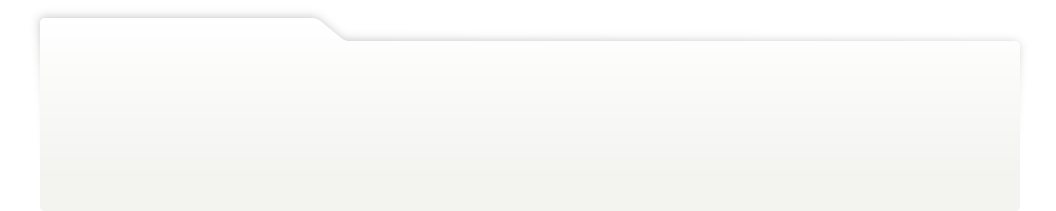
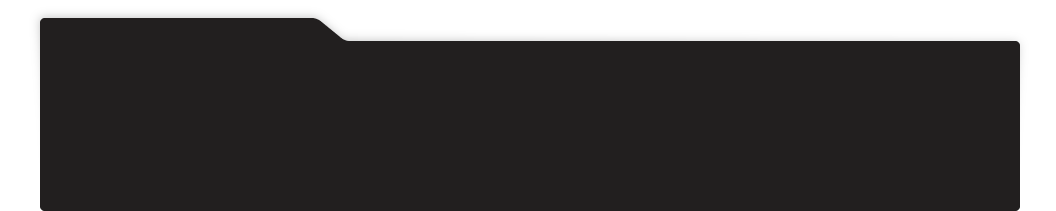
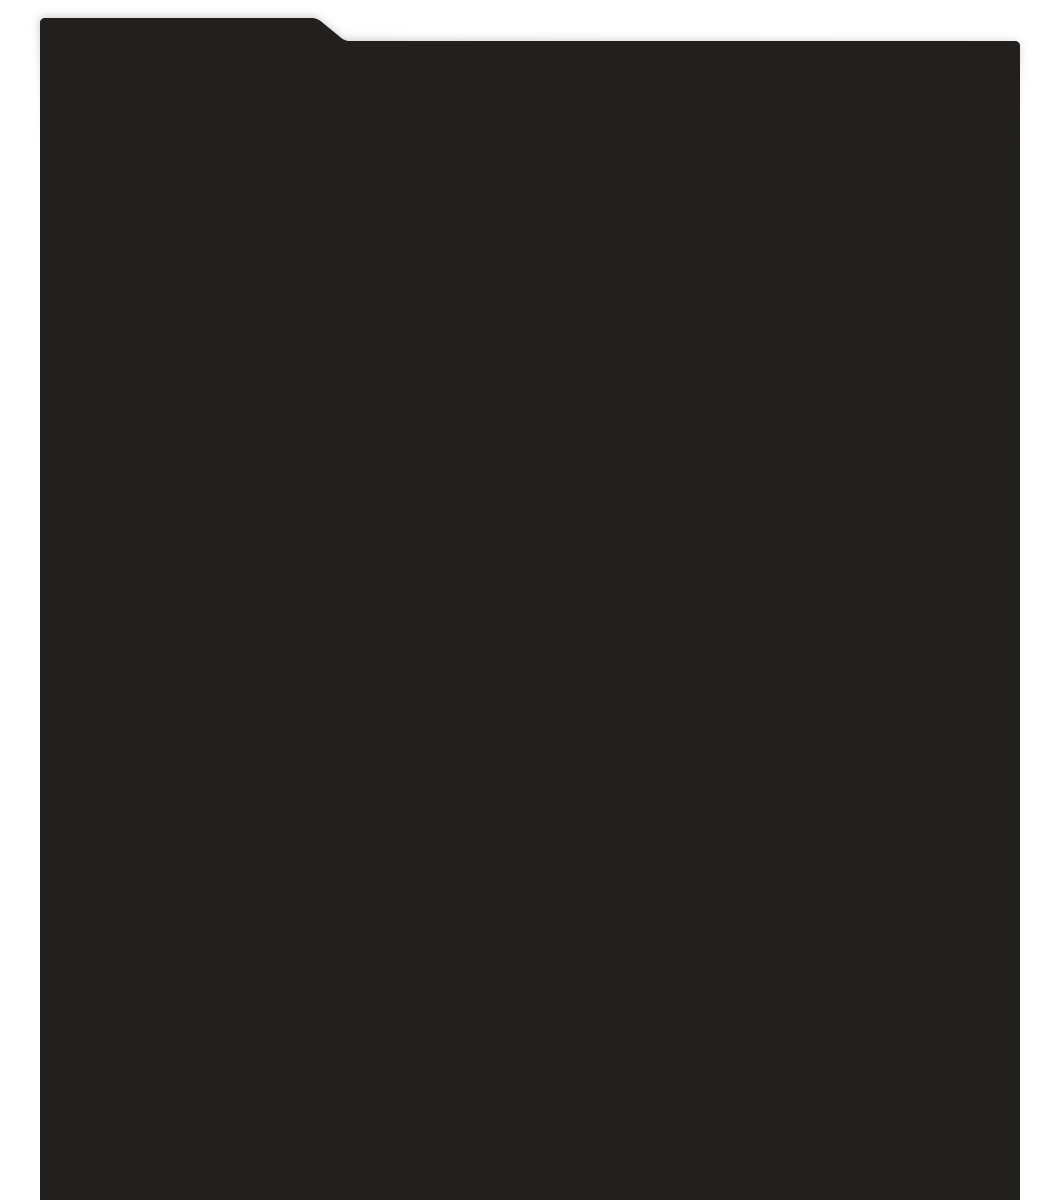
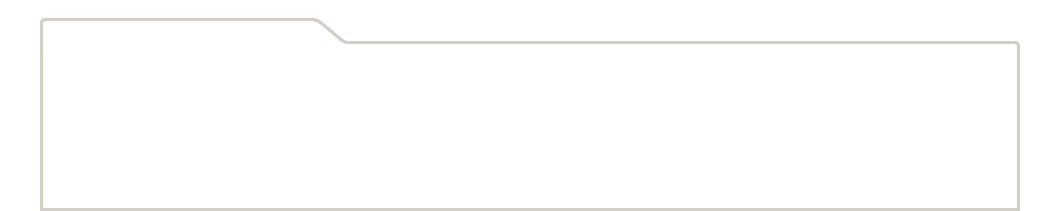
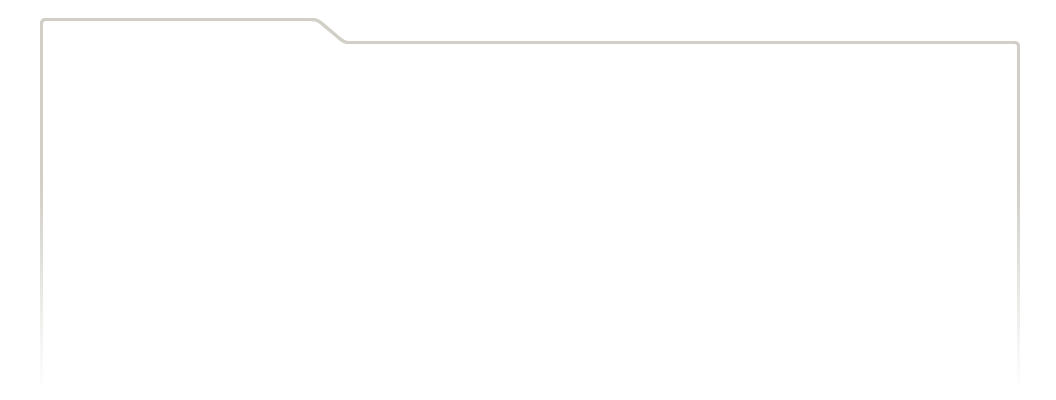
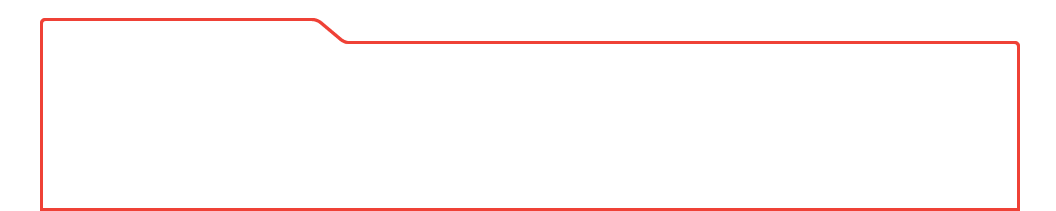
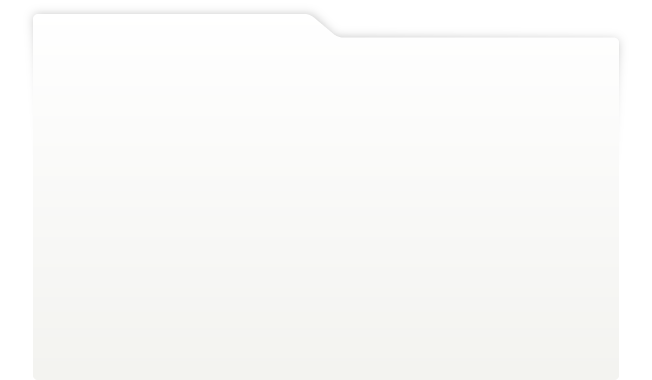
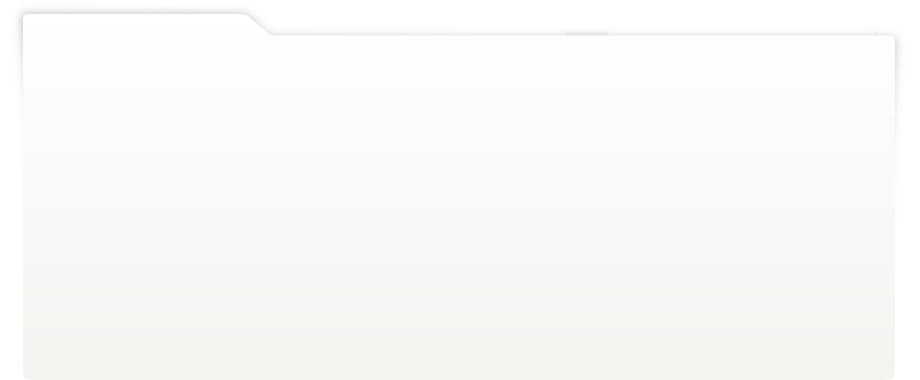
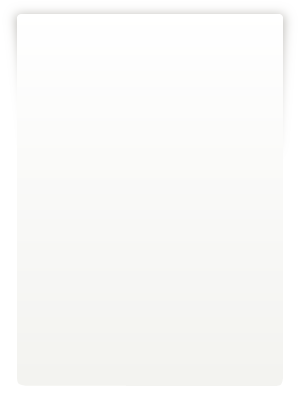
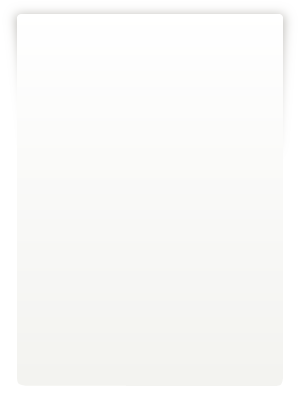
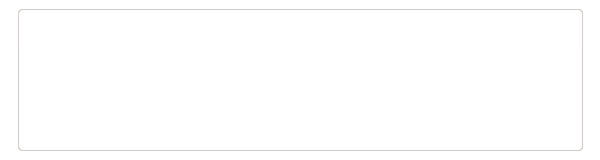
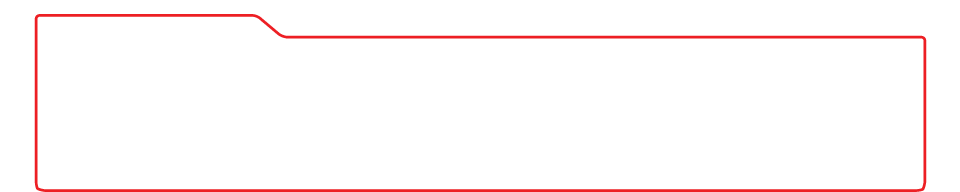
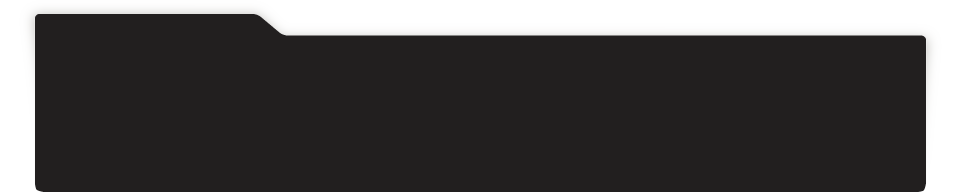
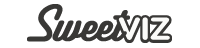
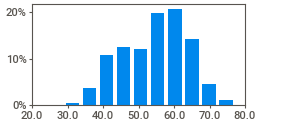
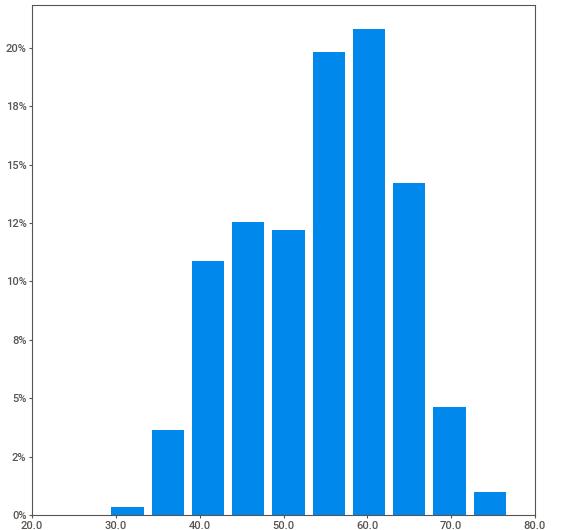
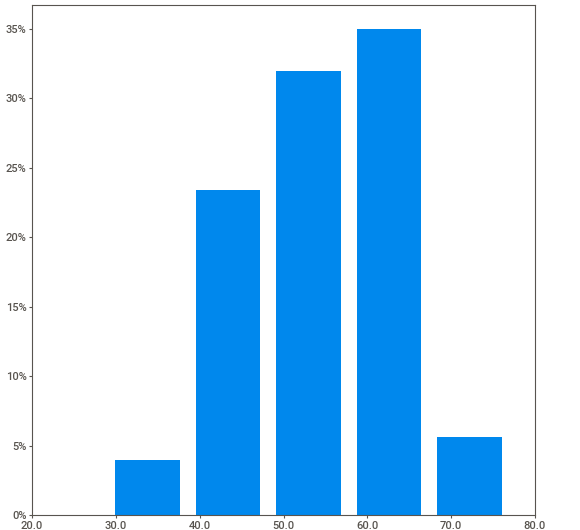
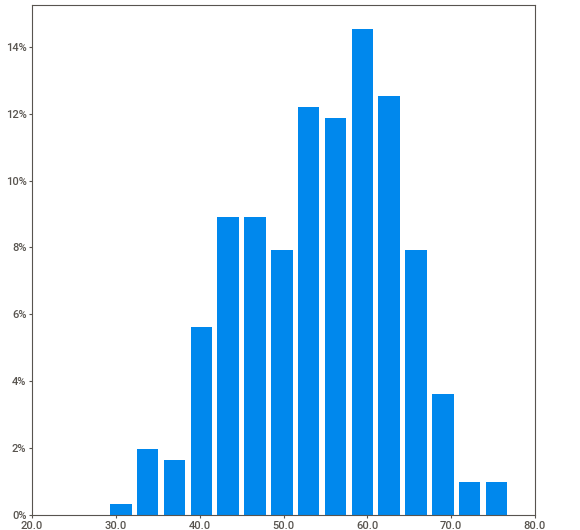
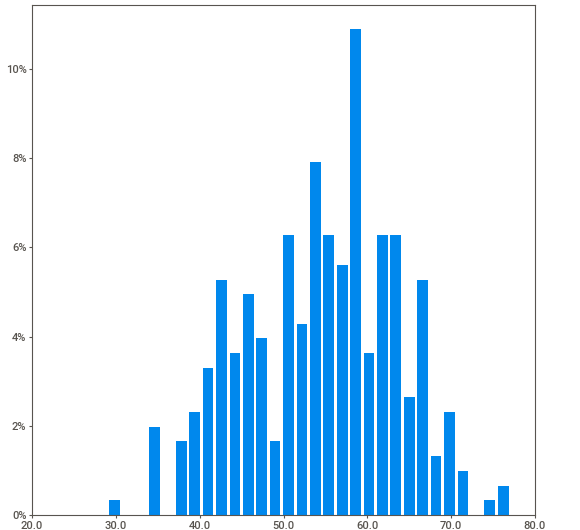
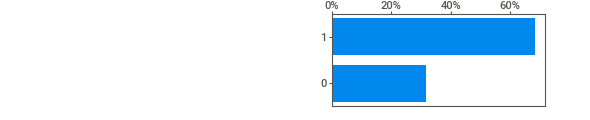
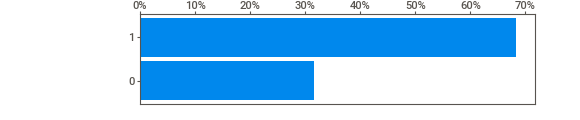
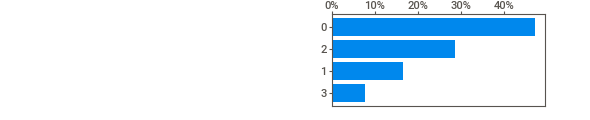
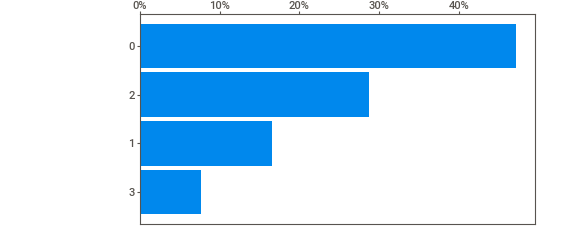
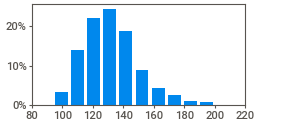
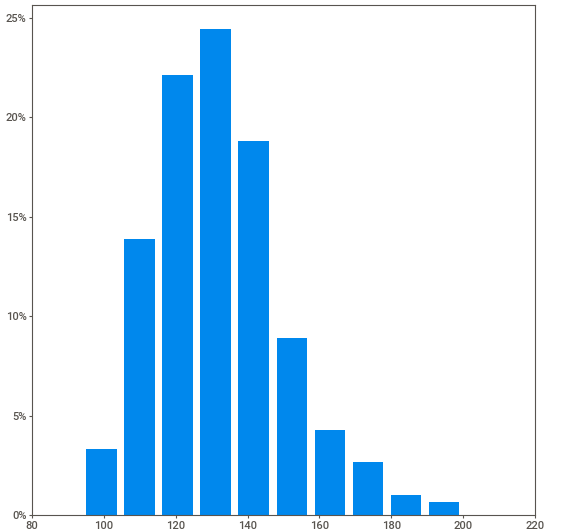
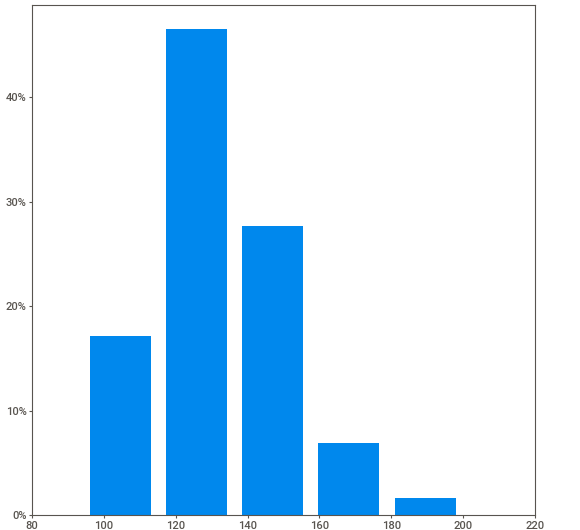
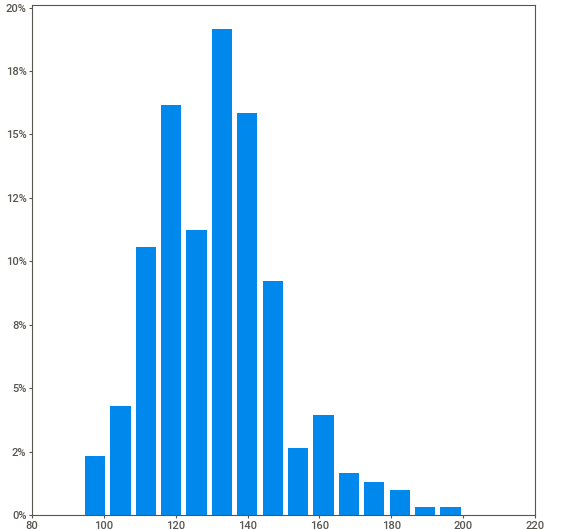
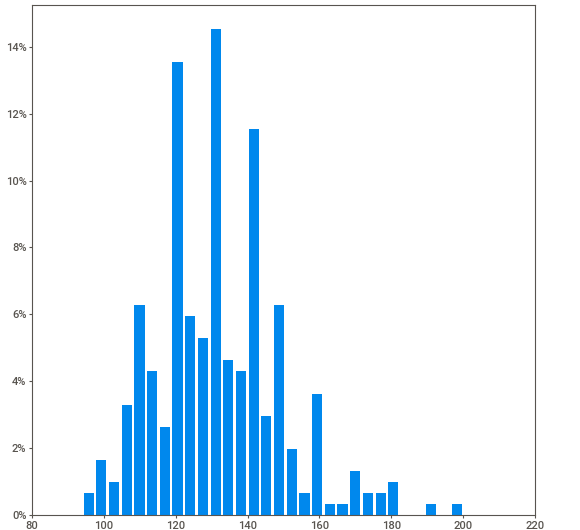
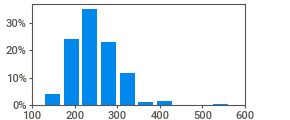
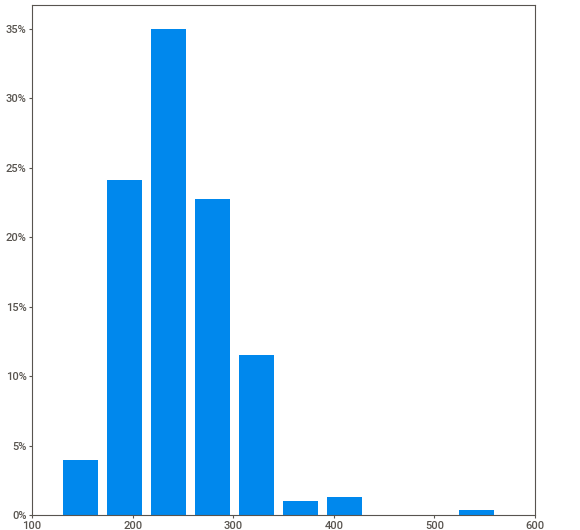
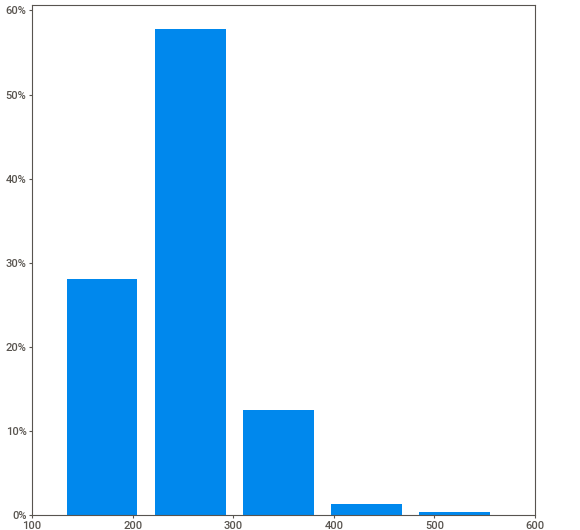
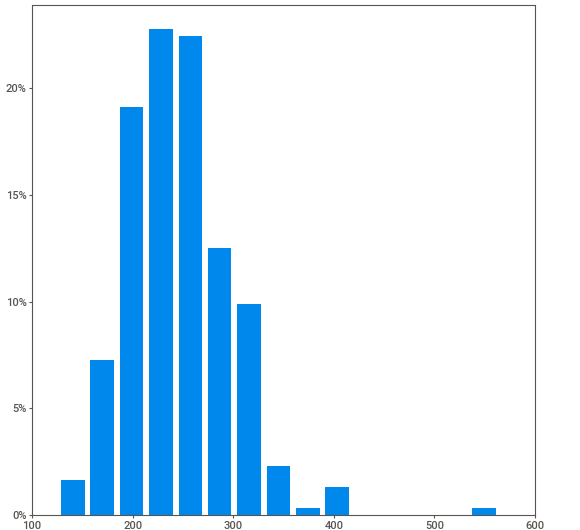
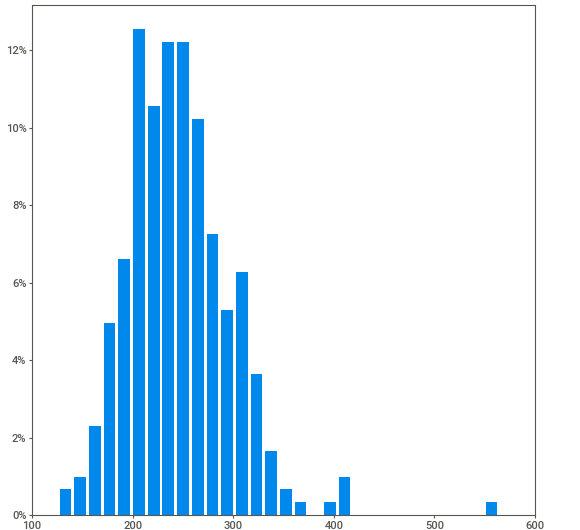
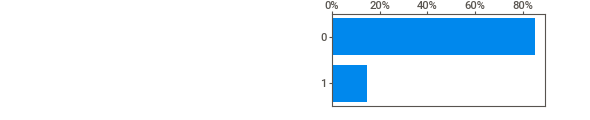
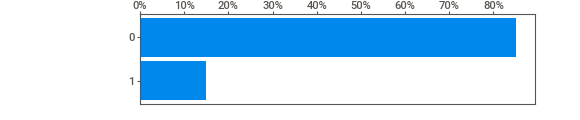
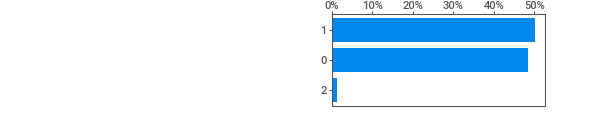
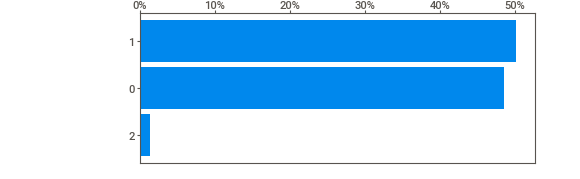
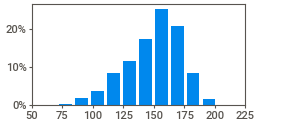
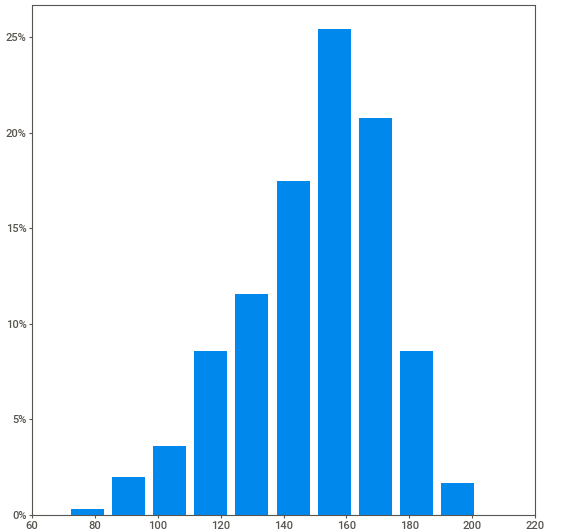
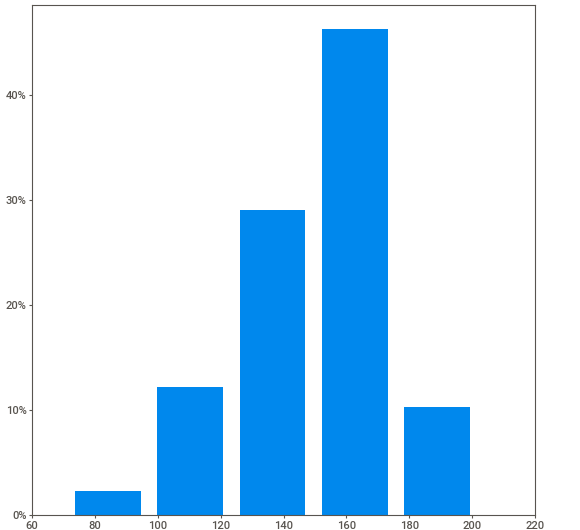
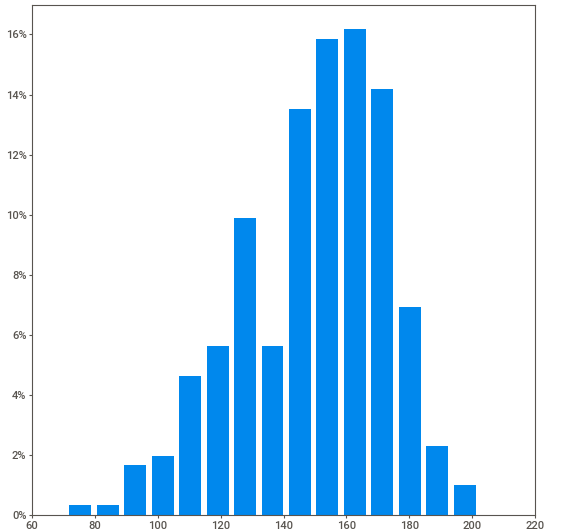
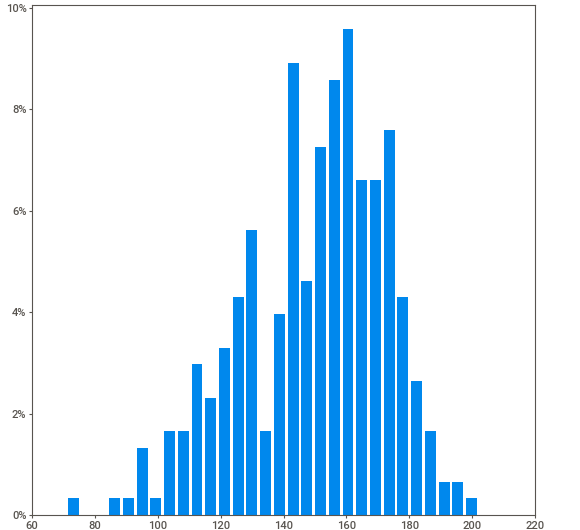
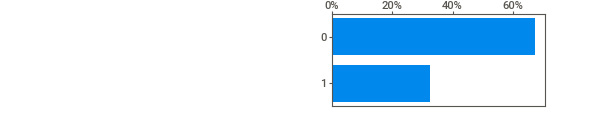
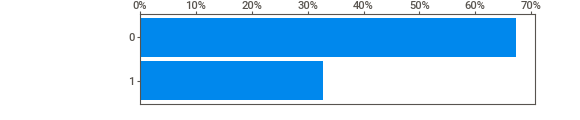
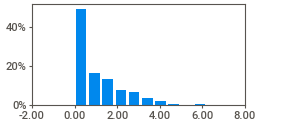
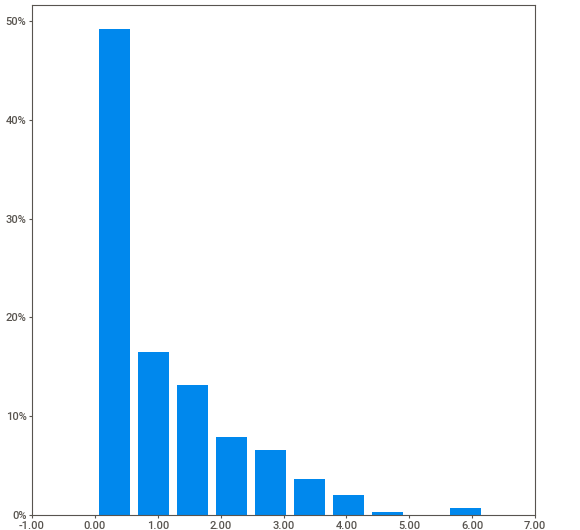
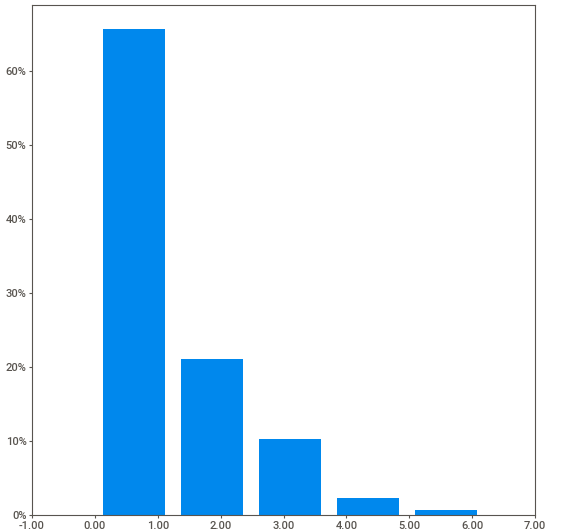
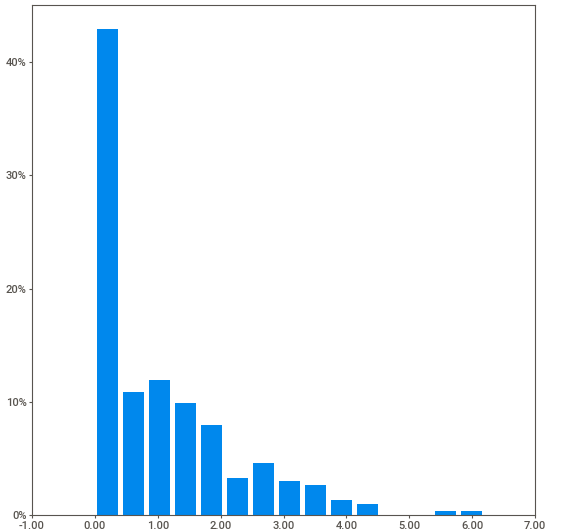
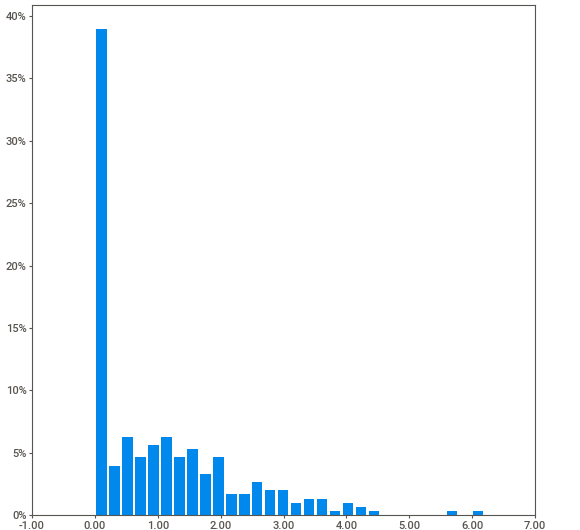
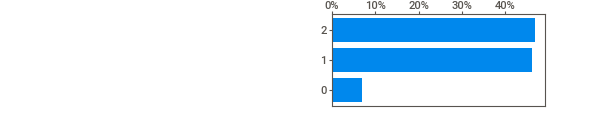
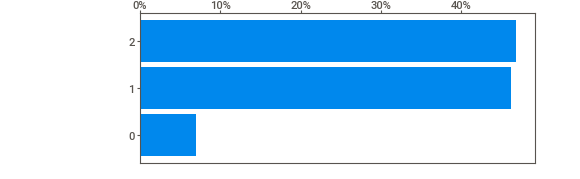
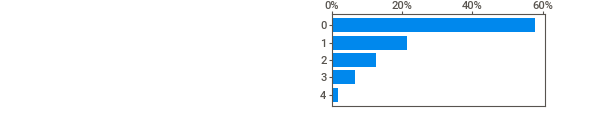
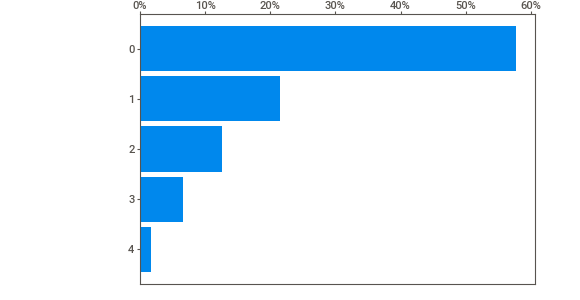
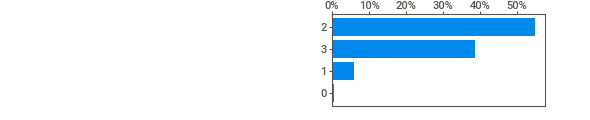
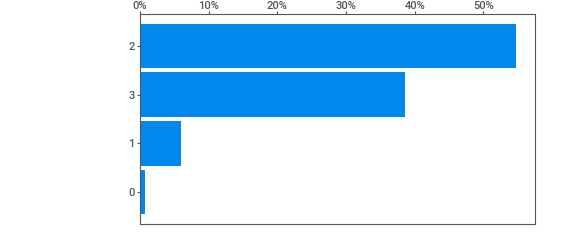
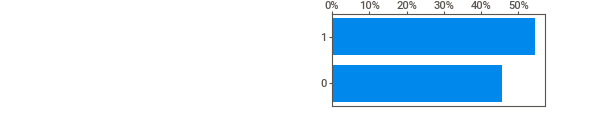
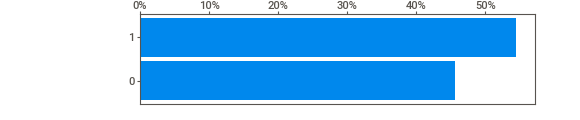
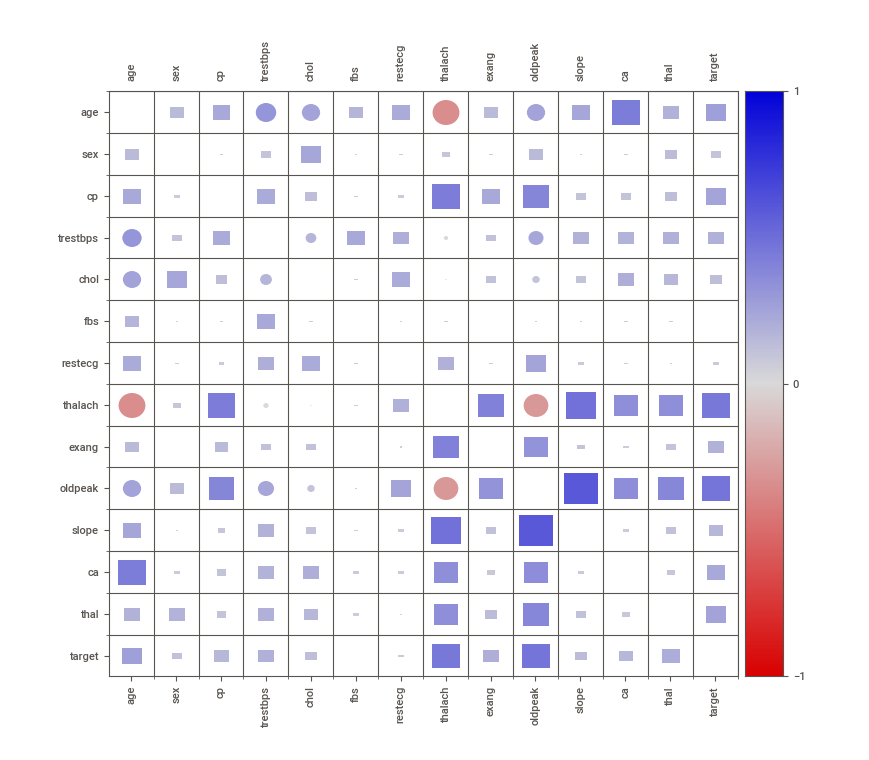
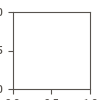

In [19]:
import pandas as pd
import sweetviz as sv

# Load your data
path="/content/drive/MyDrive/Colab Notebooks/dataset/heart.csv"
df=pd.read_csv(path)

# Generate a Sweetviz report for the dataset
report = sv.analyze(df)

# Display the report in a Jupyter Notebook
report.show_notebook()

As can be seen there is a paitient with high cholesterol. But, there's not a specific division between those that feel pain during exercise practice and those of not feel pain. We can use hue to filter by sex. It's also possible to filter using size = 'label_to_filer'.

In [20]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and 'target' is the column containing the target variable

# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Instantiate SMOTE
smote = SMOTE()

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print(y_resampled.value_counts())


1    165
0    165
Name: target, dtype: int64


In [23]:
x=X_resampled
y=y_resampled

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=12)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt=DecisionTreeClassifier()

In [28]:
dt=dt.fit(x_train,y_train)

In [29]:
y_pred=dt.predict(x_test)

In [30]:
from sklearn.metrics import *

In [31]:
accuracy_score(y_pred,y_test)

0.803030303030303

In [32]:
from sklearn import tree

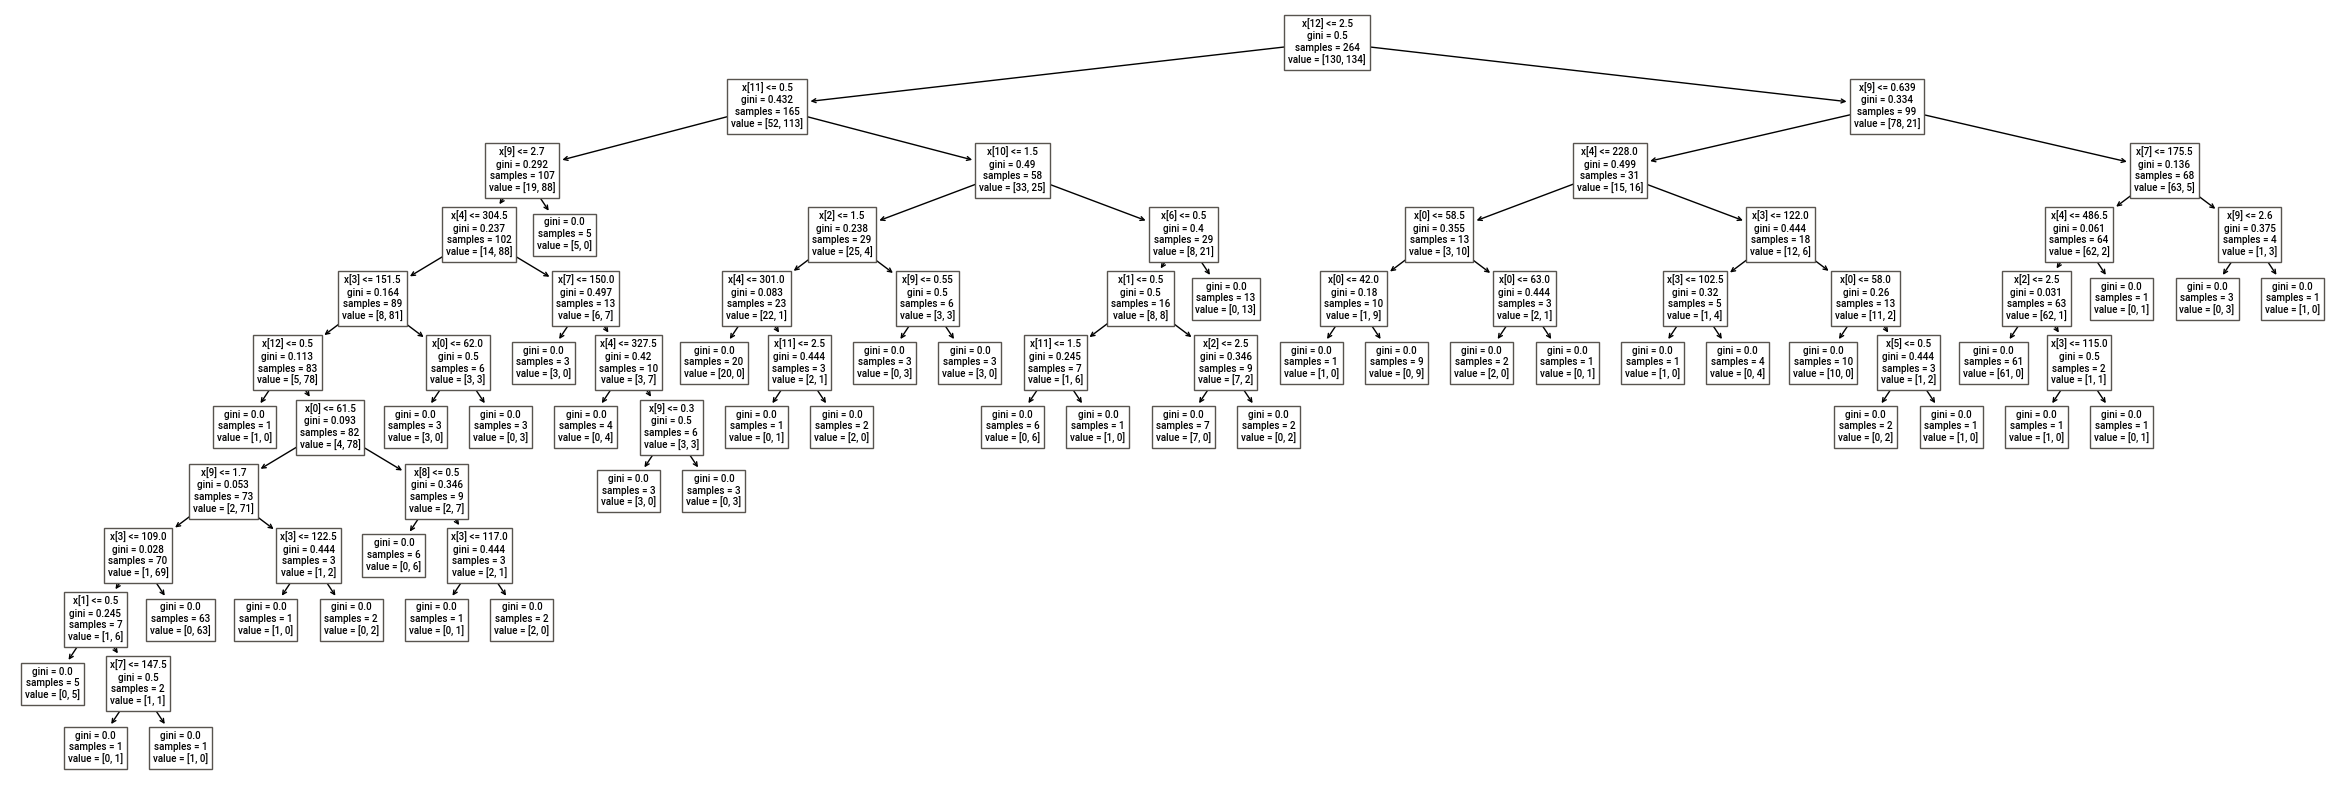

In [33]:
plt.figure(figsize=(30,10))
tree.plot_tree(dt)
plt.show()


In [34]:
!pip install scikit-learn matplotlib graphviz

In [35]:
import graphviz

In [36]:
y = y.astype(str)

In [37]:
class_names = y.unique()
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the tree visualization as a PDF or PNG file
graph.view("decision_tree")    # Open the tree visualization using the default viewer

'decision_tree.pdf'

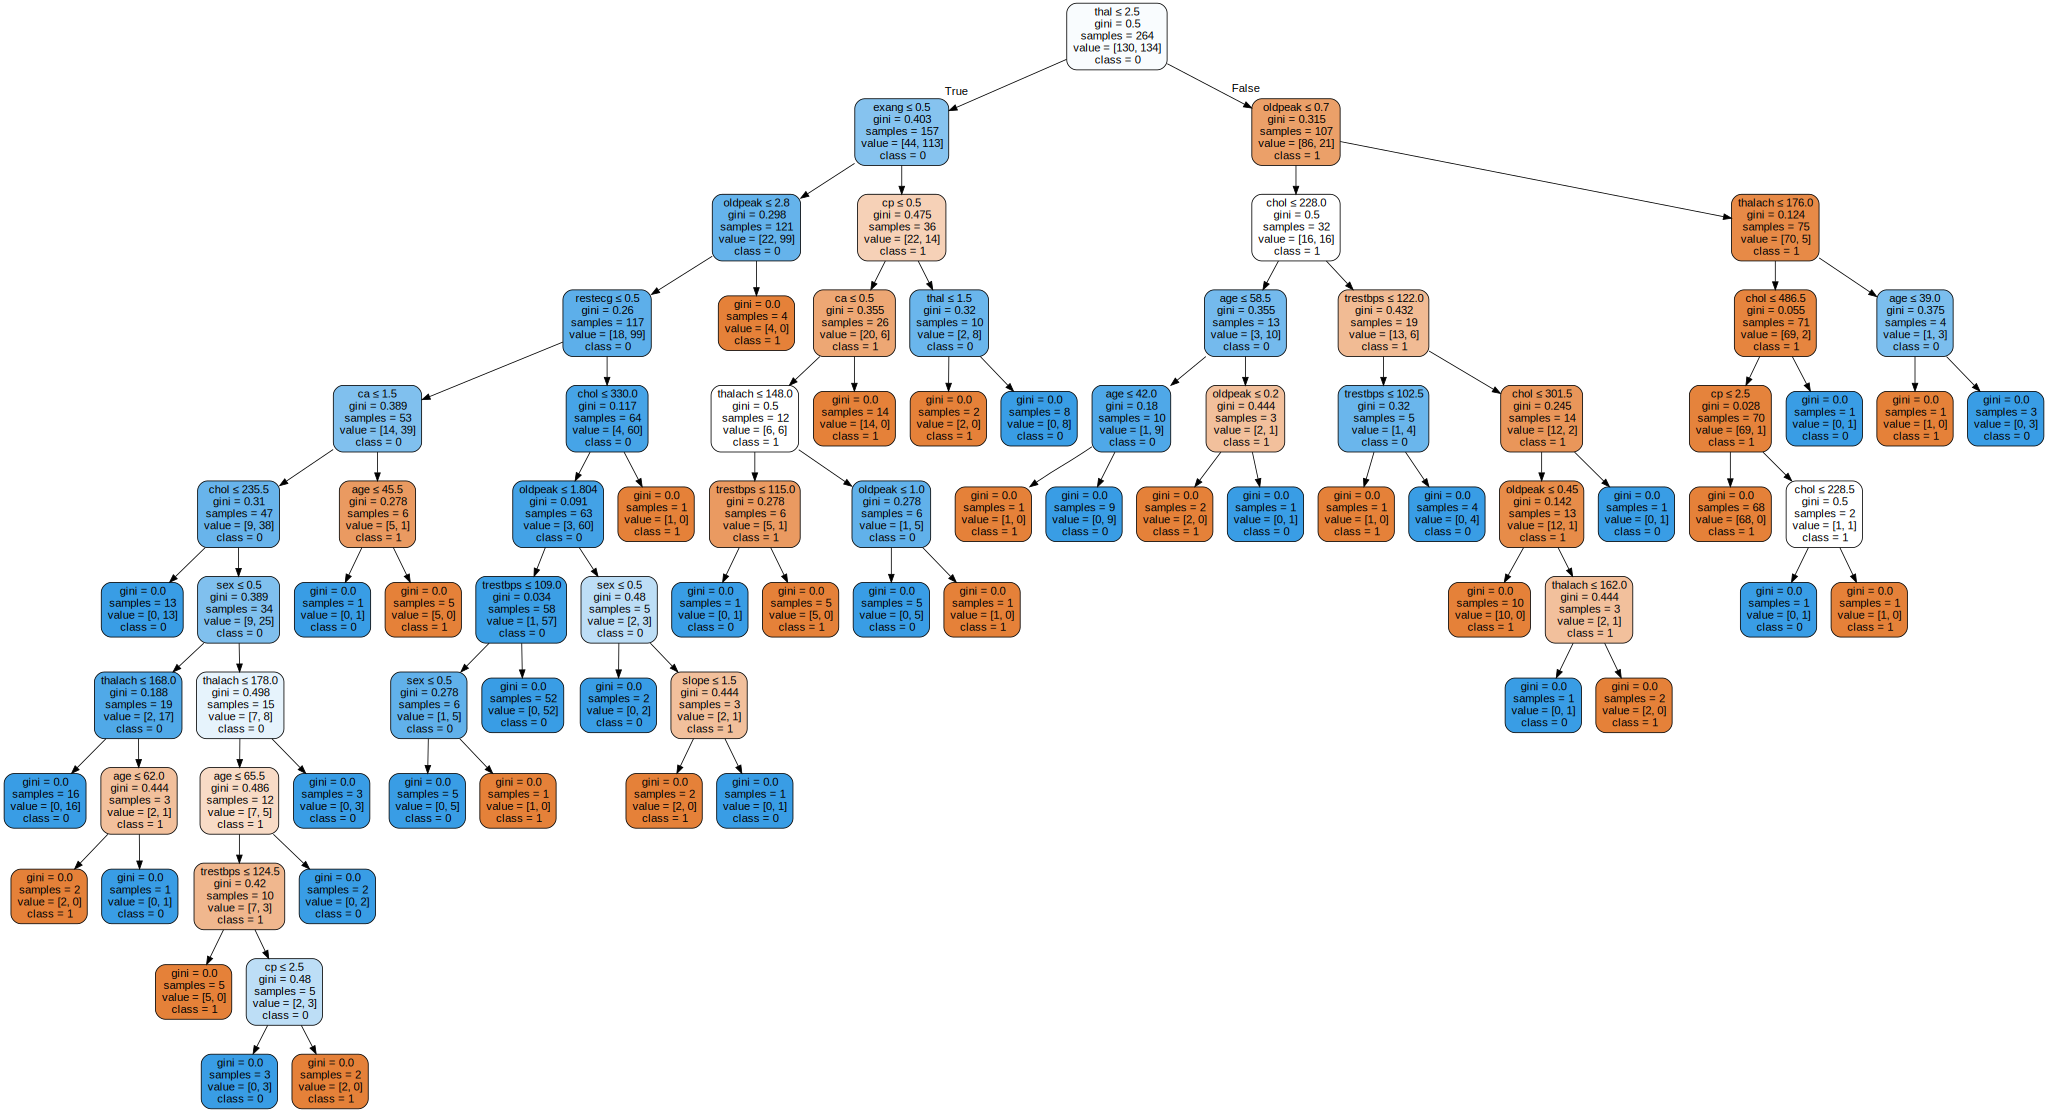

In [ ]:
graph

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [ ]:
dt=DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
best_param=grid_search.best_params_
best_dt=grid_search.best_estimator_

In [ ]:
best_param

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [ ]:
best_dt

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10)

In [ ]:
pred=best_dt.predict(x_test)

In [ ]:
accuracy_score(pred,y_test)

0.7272727272727273

In [ ]:
grid_search.best_score_

0.7993468795355587

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.00779533, 0.00359387, 0.00286574, 0.00934663, 0.00594969,
        0.00281129, 0.00582404, 0.00420918, 0.00329046, 0.00292482,
        0.00293803, 0.00278378, 0.00282359, 0.00286202, 0.00293489,
        0.00285106, 0.00309153, 0.00302238, 0.00297475, 0.00193591,
        0.00187778, 0.00190654, 0.00230312, 0.0019474 , 0.00202041,
        0.00250831, 0.00191498, 0.00209804, 0.00226917, 0.00195212,
        0.0019125 , 0.0019125 , 0.00197349, 0.0019238 , 0.00211744,
        0.0020998 , 0.0021111 , 0.00212831, 0.0019834 , 0.00203233,
        0.00204468, 0.00197392, 0.00192022, 0.00197411, 0.00221462,
        0.0019084 , 0.00195484, 0.00187073, 0.00213103, 0.00220928,
        0.00194683, 0.00197802, 0.00182414, 0.00183563, 0.00232315,
        0.00219588, 0.00195913, 0.0024879 , 0.00205545, 0.00204959,
        0.0020092 , 0.0020318 , 0.00200334, 0.00201411, 0.00195837,
        0.00207186, 0.00200911, 0.00202808, 0.00198655, 0.00192242,
        0.00202365, 0.00241294]

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007795,0.005818,0.003982,0.001985,gini,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.792453,0.830189,0.698113,0.735849,0.807692,0.772859,0.048663,36
1,0.003594,0.000435,0.003143,0.001899,gini,None,1,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.830189,0.754717,0.716981,0.735849,0.826923,0.772932,0.046970,34
2,0.002866,0.000249,0.003832,0.003496,gini,None,1,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.830189,0.792453,0.660377,0.792453,0.807692,0.776633,0.059747,29
3,0.009347,0.005440,0.004307,0.002823,gini,None,2,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.867925,0.792453,0.735849,0.811321,0.769231,0.795356,0.044166,3
4,0.005950,0.003708,0.002112,0.000215,gini,None,2,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.811321,0.811321,0.773585,0.773585,0.730769,0.780116,0.029893,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.002028,0.000077,0.001279,0.000047,entropy,15,2,5,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.811321,0.792453,0.754717,0.698113,0.788462,0.769013,0.039872,41
68,0.001987,0.000109,0.001241,0.000007,entropy,15,2,10,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.830189,0.773585,0.698113,0.849057,0.807692,0.791727,0.053129,7
69,0.001922,0.000027,0.001243,0.000023,entropy,15,4,2,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.830189,0.698113,0.698113,0.830189,0.788462,0.769013,0.059861,41
70,0.002024,0.000111,0.001252,0.000036,entropy,15,4,5,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.811321,0.679245,0.698113,0.792453,0.730769,0.742380,0.051654,72
